<a href="https://colab.research.google.com/github/mariana-0/predicciones-de-ventas/blob/master/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones de ventas

Importaciones

In [ ]:
import pandas as pd
import numpy as np

Lectura de datos

In [ ]:
filename='/content/drive/MyDrive/CodingDojo_DataScience/Asignaciones/predicciones-de-ventas/sales_predictions.csv'

In [ ]:
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1) ¿Cuántas filas y columnas?

In [ ]:
df.shape
#filas:8523, columnas:12

(8523, 12)

## 2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()
#No hay duplicados

0

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## 4) Identifiquen los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

Item_Weight: se calculará el promedio de los pesos de los productos, y se completarán los datos faltantes de esta forma. Ya que es un valor que probablemente se acerque más al valor correcto, dada la información disponible.

In [ ]:
average=df['Item_Weight'].mean()
df['Item_Weight']=df['Item_Weight'].fillna(average)
df['Item_Weight'].isna().sum()

0

Oulet_Size: se evaluará si hay un valor demasiado común en comparación con los otros. Si es así se completarán los datos con este, si no es así se creará una nueva categoria de size no defined.

In [ ]:
df['Outlet_Size'].value_counts()
#No hay valor demasiado repetido comparado con los demás

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].fillna('no_defined')
df['Outlet_Size'].isna().sum()

0

## 6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
for column in df.columns:
  print(column, df[column].value_counts())
#Item_Fat_Content => Low Fat low fat y LF


Item_Identifier FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Weight 12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
Item_Fat_Content Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Visibility 0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Item_Type Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned     

Item_Fat_Content => Low Fat, low fat, y LF. Regular y reg

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['reg'],'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## 8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Gráficos

### Histograma para ver las distribuciones de diversas características en el conjunto de datos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

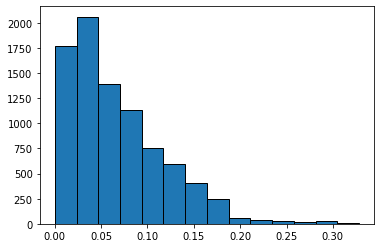

In [ ]:
plt.hist(df['Item_Visibility'],bins=14,edgecolor='black')
plt.show()

La mayoría de los items tienen una visibilidad de entre 0.025 y 0.05. A partir de ahí la cantidad de items va en orden descendente mientras que la visiblidad va en orden ascendente. 

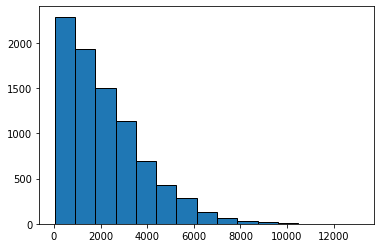

In [ ]:
plt.hist(df['Item_Outlet_Sales'],bins=15, edgecolor='black')
plt.show()

No hay muchos articulos con ventas altas, la mayoría de los articulos tienen ventas menores que 2000.

### Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

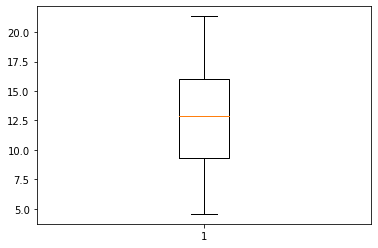

In [ ]:
plt.boxplot(df['Item_Weight'])
plt.show()

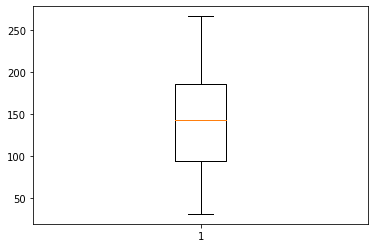

In [ ]:
plt.boxplot(df['Item_MRP'])
plt.show()

A primera vista, ambos diagramas lucen simétricos, no parecen haber sesgos significativos.

https://support.minitab.com/es-mx/minitab/21/help-and-how-to/graphs/boxplot/interpret-the-results/key-results/

### Mapa de calor de la correlación entre las características.

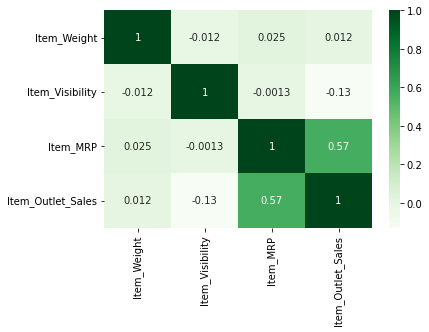

In [ ]:
corr = df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

La correlación más significativa que se presenta es entre Item MRP y Item Outlet Sales, es una correlación positiva de 0.57, se considera una correlación moderada (se encuentra entre 0.5 y 0.7)

## + Gráficos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
grafica_1=df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()
grafica_1.sort_values(ascending=False)

Outlet_Size
Medium        2681.603542
High          2298.995256
Small         1912.149161
no_defined    1822.626947
Name: Item_Outlet_Sales, dtype: float64

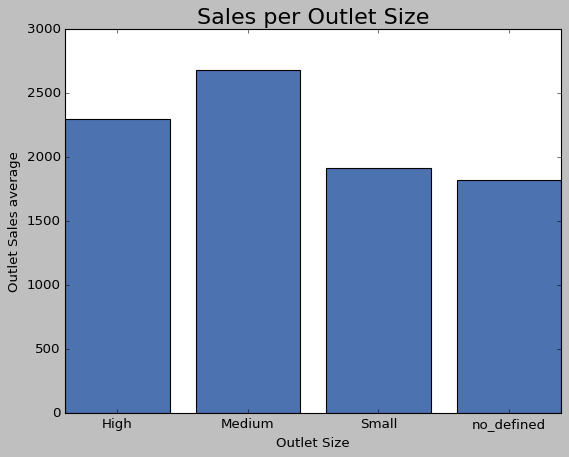

In [ ]:
plt.bar(grafica_1.index,grafica_1.values)
plt.style.use('seaborn-deep')
plt.xlabel('Outlet Size',fontsize='12')
plt.ylabel('Outlet Sales average',fontsize='12')
plt.title('Sales per Outlet Size', fontsize='20')
plt.show()

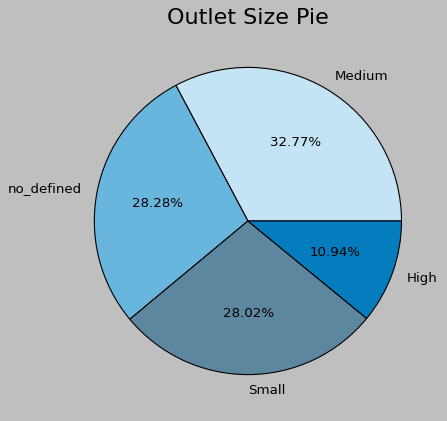

In [ ]:
grafico_2=df['Outlet_Size'].value_counts()
plt.pie(grafico_2.values, autopct='%.2f%%', labels=grafico_2.index, colors=['#c4e4f5','#68b5de','#5d879e','#047cbd'])
plt.title('Outlet Size Pie', fontsize='20')
plt.show()

Las tiendas medianas representan el 32.77% del total de las tiendas, así mismo tienen el mayor promedio en ventas. Las tiendas grandes tienen el segundo mayor promedio de ventas, sin embargo del total de tiendas solo el 11% son tiendas grandes.

In [ ]:
grafico_3=df['Outlet_Establishment_Year'].value_counts()
grafico_3=grafico_3.sort_index()
ejex=list(grafico_3.index)
ejey=list(grafico_3.values)
grafico_3

1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

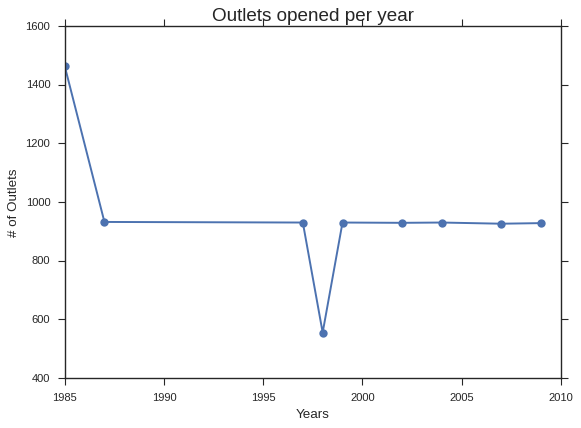

In [ ]:
plt.style.use('seaborn-ticks')
plt.plot(ejex, ejey, marker='.', markersize=15)
plt.title('Outlets opened per year', fontsize='17')
plt.xlabel('Years', fontsize='12')
plt.ylabel('# of Outlets', fontsize='12')
plt.ticklabel_format(useOffset=False, style='plain')

El gráfico anterior muestra el número de tiendas que se abrieron por año, además se puede ver que hay rangos más amplios y otros más cortos, por ejemplo, entre 1990 y 1995 no se abrió ninguna tienda, pero entre 2000 y 2005 se abrieron tiendas en dos años años.